In [1]:
import json
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_filename='train.json'
train_content = pd.read_json(codecs.open(train_filename, mode='r', encoding='utf-8'))
pd.set_option('display.max_colwidth',700)

In [2]:
train_content.head(5)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]"
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]"
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]"
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam masala, double cream, natural yogurt, bay leaf]"


In [3]:
categories=np.unique(train_content['cuisine'])
print("There are {} types of cuisine.\n{}".format(len(categories),categories))

There are 20 types of cuisine.
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']


In [4]:
train_ingredients = train_content['ingredients']
train_targets = train_content.cuisine

print(train_ingredients, train_targets)

0                                                                                                                                                                                                        [romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles]
1                                                                                                                                                                                                 [plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil]
2                                                                                                                                                                                  [eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers]
3               

In [5]:
sum_ingredients={}
for ingredients in train_ingredients:
    for element in ingredients:
        if element in sum_ingredients:
            sum_ingredients[element]+=1
        else:
            sum_ingredients[element]=1
sum_ingredients

{'romaine lettuce': 270,
 'black olives': 229,
 'grape tomatoes': 228,
 'garlic': 7380,
 'pepper': 4438,
 'purple onion': 1896,
 'seasoning': 137,
 'garbanzo beans': 148,
 'feta cheese crumbles': 358,
 'plain flour': 154,
 'ground pepper': 385,
 'salt': 18049,
 'tomatoes': 3058,
 'ground black pepper': 4785,
 'thyme': 361,
 'eggs': 3388,
 'green tomatoes': 108,
 'yellow corn meal': 341,
 'milk': 2263,
 'vegetable oil': 4385,
 'mayonaise': 781,
 'cooking oil': 483,
 'green chilies': 768,
 'grilled chicken breasts': 5,
 'garlic powder': 1442,
 'yellow onion': 1184,
 'soy sauce': 3296,
 'butter': 4848,
 'chicken livers': 65,
 'water': 7457,
 'wheat': 26,
 'black pepper': 2627,
 'shallots': 1477,
 'cornflour': 103,
 'cayenne pepper': 1523,
 'onions': 7972,
 'garlic paste': 282,
 'lemon juice': 1395,
 'chili powder': 2036,
 'passata': 24,
 'oil': 1970,
 'ground cumin': 2747,
 'boneless chicken skinless thigh': 343,
 'garam masala': 925,
 'double cream': 40,
 'natural yogurt': 18,
 'bay leaf

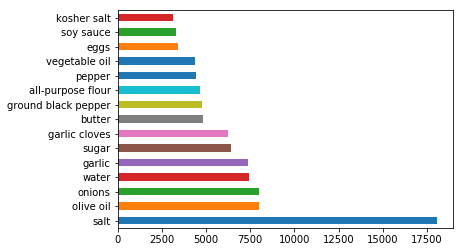

In [6]:
#the 10 most used ingredients
df=pd.DataFrame(sum_ingredients, index=[0]).transpose()[0].sort_values(ascending=False,inplace=False)[:15]
fig=df.plot.barh()
plt.show()

In [7]:
chinese_ingredients={}
chinese=[]
for i in range(len(train_targets)-1):
    if train_targets[i]=='chinese':
        chinese.append(train_ingredients[i])
for ingredients in chinese:
    for element in ingredients:
        if element in chinese_ingredients:
            chinese_ingredients[element]+=1
        else:
            chinese_ingredients[element]=1
chinese_ingredients

{'low sodium soy sauce': 213,
 'fresh ginger': 469,
 'dry mustard': 6,
 'green beans': 28,
 'white pepper': 222,
 'sesame oil': 915,
 'scallions': 591,
 'canola oil': 177,
 'sugar': 824,
 'Shaoxing wine': 247,
 'garlic': 763,
 'ground turkey': 14,
 'water': 762,
 'crushed red pepper flakes': 74,
 'corn starch': 906,
 'sesame seeds': 162,
 'red pepper': 60,
 'yellow peppers': 3,
 'extra firm tofu': 33,
 'broccoli': 74,
 'soy sauce': 1363,
 'orange bell pepper': 3,
 'arrowroot powder': 3,
 'red curry paste': 3,
 'lo mein noodles': 24,
 'salt': 907,
 'chicken broth': 165,
 'light soy sauce': 254,
 'flank steak': 72,
 'beansprouts': 109,
 'dried black mushrooms': 9,
 'pepper': 158,
 'chives': 18,
 'oyster sauce': 333,
 'dark soy sauce': 230,
 'peanuts': 78,
 'cabbage': 54,
 'green bell pepper': 61,
 'egg roll wrappers': 38,
 'sweet and sour sauce': 9,
 'molasses': 12,
 'vegetable oil': 602,
 'oil': 338,
 'shredded cabbage': 20,
 'onions': 280,
 'fresh ginger root': 96,
 'ground pork': 179,

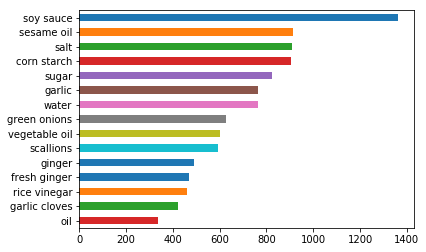

In [8]:
df=pd.DataFrame(chinese_ingredients, index=[0]).transpose()[0].sort_values(ascending=False,inplace=False)[:15]
fig=df.plot.barh()
fig.invert_yaxis()
plt.show()

In [9]:
thai_ingredients={}
thai=[]
for i in range(len(train_targets)-1):
    if train_targets[i]=='thai':
        thai.append(train_ingredients[i])
for ingredients in thai:
    for element in ingredients:
        if element in thai_ingredients:
            thai_ingredients[element]+=1
        else:
            thai_ingredients[element]=1
thai_ingredients

{'sugar': 330,
 'hot chili': 5,
 'asian fish sauce': 92,
 'lime juice': 220,
 'pork loin': 6,
 'roasted peanuts': 71,
 'chopped cilantro fresh': 164,
 'hoisin sauce': 17,
 'creamy peanut butter': 71,
 'chopped fresh mint': 42,
 'thai basil': 102,
 'rice': 21,
 'medium shrimp': 60,
 'water': 310,
 'rice noodles': 133,
 'beansprouts': 152,
 'eggs': 106,
 'shallots': 234,
 'firm tofu': 32,
 'turnips': 5,
 'palm sugar': 100,
 'vegetable oil': 335,
 'garlic cloves': 299,
 'sliced chicken': 1,
 'fish sauce': 625,
 'lime wedges': 113,
 'green papaya': 11,
 'chile powder': 5,
 'ground black pepper': 50,
 'tamarind paste': 41,
 'chinese chives': 7,
 'chicken thighs': 23,
 'cooking oil': 45,
 'garlic': 414,
 'black pepper': 37,
 'lemongrass': 230,
 'large garlic cloves': 38,
 'unsweetened coconut milk': 118,
 'fresh ginger': 200,
 'peanut sauce': 14,
 'spareribs': 1,
 'sesame oil': 135,
 'tamari soy sauce': 15,
 'golden brown sugar': 5,
 'dry sherry': 6,
 'boiling water': 9,
 'extra firm tofu': 

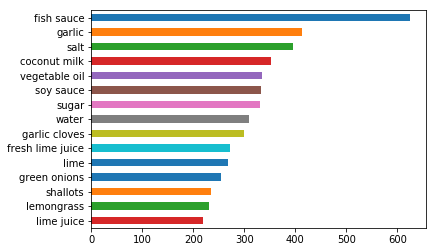

In [10]:
df=pd.DataFrame(thai_ingredients, index=[0]).transpose()[0]
df=df.sort_values(ascending=False,inplace=False)[:15]
#df.transpose()[0].sort_values(ascending=False,inplace=False)
fig=df.plot.barh()
fig.invert_yaxis()
plt.show()

In [11]:

import re
from nltk.stem import WordNetLemmatizer

def text_clean(ingredients):
    #keep characters only
    ingredients= np.array(ingredients).tolist()
    print("original:\n{}".format(ingredients[9]))
    ingredients=[[re.sub('[^A-Za-z]', ' ', word) for word in component]for component in ingredients]
    print("after:\n{}".format(ingredients[9]))

    # make all the words are in same tense
    lemma=WordNetLemmatizer()
    ingredients=[" ".join([ " ".join([lemma.lemmatize(w) for w in words.split(" ")]) for words in component])  for component in ingredients]
    print("after:\n{}".format(ingredients[9]))
    return ingredients

train_ingredients = text_clean(train_content['ingredients'])
len(train_ingredients)

original:
['chopped tomatoes', 'fresh basil', 'garlic', 'extra-virgin olive oil', 'kosher salt', 'flat leaf parsley']
after:
['chopped tomatoes', 'fresh basil', 'garlic', 'extra virgin olive oil', 'kosher salt', 'flat leaf parsley']
after:
chopped tomato fresh basil garlic extra virgin olive oil kosher salt flat leaf parsley


39774

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 1),
                analyzer='word', max_df=0.2, binary=False,
                token_pattern=r"\w+",sublinear_tf=False)
train_tfidf = vectorizer.fit_transform(train_ingredients).todense()


In [13]:
train_targets=np.array(train_content['cuisine']).tolist()
train_tfidf[:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
from pandas import DataFrame as df
df(train_tfidf).head(5)
df(train_targets).head(5)
df(train_tfidf).shape

(39774, 2768)

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(train_tfidf, train_targets, test_size=0.25, random_state=50)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1,2,3,4,5,6,7,8,9]}

classifier = LogisticRegression()

grid = GridSearchCV(classifier,parameters)

grid = grid.fit(X_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score

y_predict = grid.predict(X_test)
score=accuracy_score(y_test,y_predict)

print("The scoring is ：{}".format(score))

The scoring is ：0.787711182622687


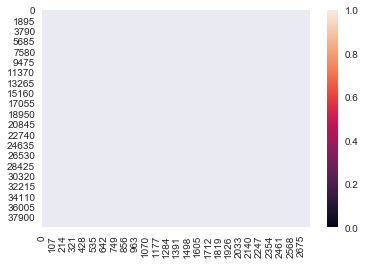

In [18]:
import seaborn as sns; sns.set()
ax = sns.heatmap(train_tfidf)
